# Autocorrelation

In [1]:
import esda  
import numpy as np
import pandas as pd
import libpysal as lps
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
from shapely.geometry import Point
from pylab import figure, scatter, show
from esda.moran import Moran
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local
from splot.esda import plot_moran
from splot.esda import lisa_cluster
from splot.esda import plot_local_autocorrelation

In [29]:
# reading data
LSOAairbnb = gpd.read_file('./densityshapefile/LSOAairbnb.shp')
LSOAairbnb = LSOAairbnb.to_crs(epsg=27700)


## Global Moran'I 

In [15]:
#https://www.yisu.com/zixun/503529.html
#https://blog.csdn.net/Janine_1991/article/details/121263384

#spatial weight matrix
y = LSOAairbnb['density'].values
w = lps.weights.distance.Kernel.from_dataframe(LSOAairbnb, fixed=False, k=15)
w.transform = 'r'

In [16]:
moran = Moran(y,w)
moran.I 

0.7874826762787973

## Local Moran'I (LISA)

In [17]:
# Local Moran'I value
moran_loc = Moran_Local(y, w)
moran_loc

In [6]:
?moran_scatterplot

Signature:
moran_scatterplot(
    moran,
    zstandard=True,
    p=None,
    aspect_equal=True,
    ax=None,
    scatter_kwds=None,
    fitline_kwds=None,
)
Docstring:
Moran Scatterplot

Parameters
----------
moran : esda.moran instance
    Values of Moran's I Global, Bivariate and Local
    Autocorrelation Statistics
zstandard : bool, optional
    If True, Moran Scatterplot will show z-standardized attribute and
    spatial lag values. Default =True.
p : float, optional
    If given, the p-value threshold for significance
    for Local Autocorrelation analysis. Points will be colored by
    significance. By default it will not be colored.
    Default =None.
aspect_equal : bool, optional
    If True, Axes will show the same aspect or visual proportions
    for Moran Scatterplot.
ax : Matplotlib Axes instance, optional
    If given, the Moran plot will be created inside this axis.
    Default =None.
scatter_kwds : keyword arguments, optional
    Keywords used for creating and designing 

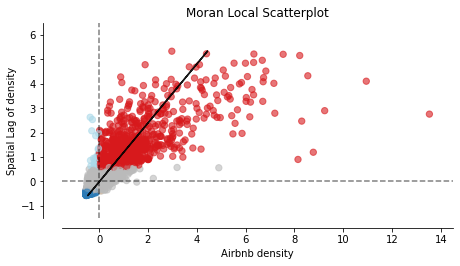

In [32]:

#scatter plot
#fig, ax = plt.subplots(figsize=(10,8)) #, subplot_kw={'aspect': 'equal'}
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Airbnb density')
ax.set_ylabel('Spatial Lag of density')

from matplotlib.pyplot import MultipleLocator
#setting the label 
x_major_locator = MultipleLocator(2)
y_major_locator = MultipleLocator(1) 

ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
#setting y axis range
plt.ylim(-1.5,6.5)
#setting y axis range
plt.xlim(-1.5,14.5)

plt.show()

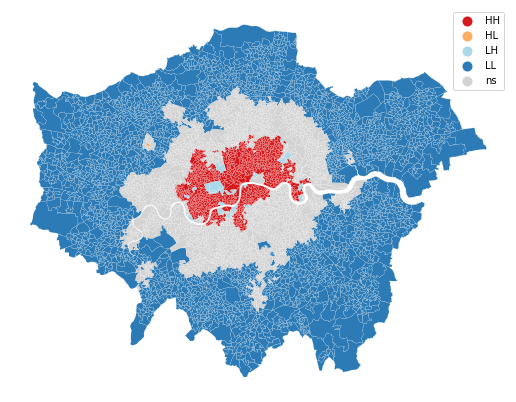

In [33]:
#spatial distribution of cluster area
#LSOAairbnb.to_crs(epsg=2770).plot(ax=ax,edgecolor="black", linewidth=.1, color='lightgrey')

lisa_cluster(moran_loc, LSOAairbnb, p=0.05, figsize = (9,9))

plt.show()

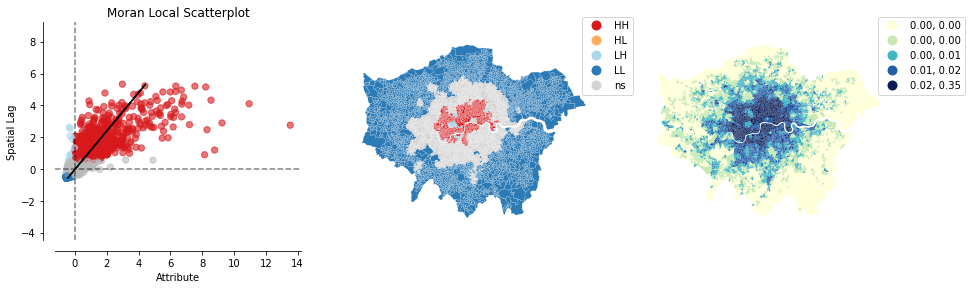

In [31]:
plot_local_autocorrelation(moran_loc, LSOAairbnb, 'density')
plt.show()